In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

In [42]:
df = pd.read_csv("../dataset/amazon_products_sales_data_cleaned.csv")

# Quick dataset overview
print("Dataset shape:", df.shape)
print("\nMissing values per column:\n", df.isna().sum())
print("\nData types:\n", df.dtypes)
print("\nBasic statistics for numeric columns:\n", df.describe())

Dataset shape: (42675, 17)

Missing values per column:
 product_title               0
product_rating           1024
total_reviews            1024
purchased_last_month    10511
discounted_price         2062
original_price           2062
is_best_seller              0
is_sponsored                0
has_coupon                  0
buy_box_availability    14653
delivery_date           11983
sustainability_tags     39267
product_image_url           0
product_page_url         2069
data_collected_at           0
product_category            0
discount_percentage      2062
dtype: int64

Data types:
 product_title            object
product_rating          float64
total_reviews           float64
purchased_last_month    float64
discounted_price        float64
original_price          float64
is_best_seller           object
is_sponsored             object
has_coupon               object
buy_box_availability     object
delivery_date            object
sustainability_tags      object
product_image_url      

In [43]:
# Data preprocessing
for col in ['is_sponsored', 'has_coupon']:
    df[col] = df[col].str.lower().map({'yes': True, 'no': False})

df['is_best_seller'] = df['is_best_seller'].str.lower().map({'best seller': True, 'no badge': False})
    
df['delivery_date'] = pd.to_datetime(df['delivery_date'], errors='coerce')
df['data_collected_at'] = pd.to_datetime(df['data_collected_at'], errors='coerce')

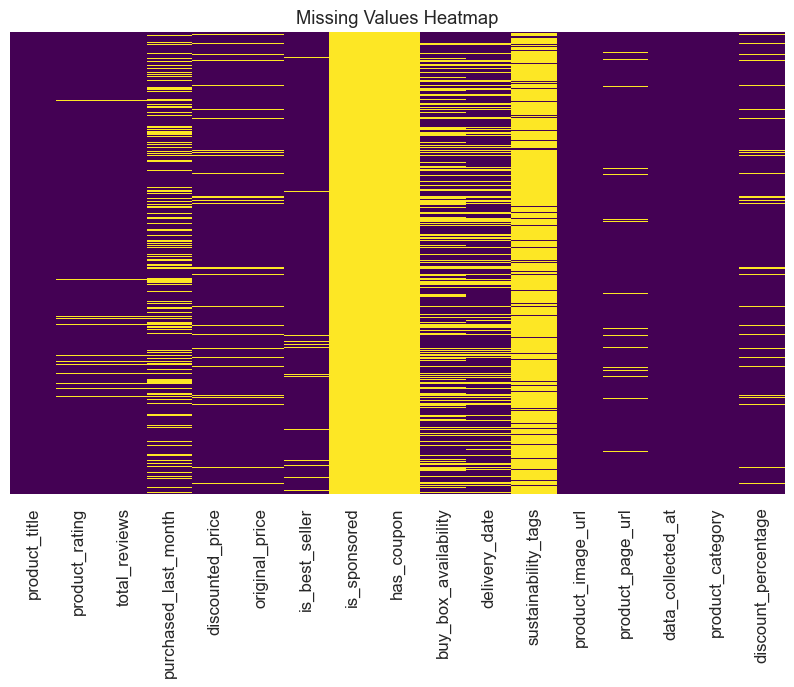

In [44]:
# Missing Value Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

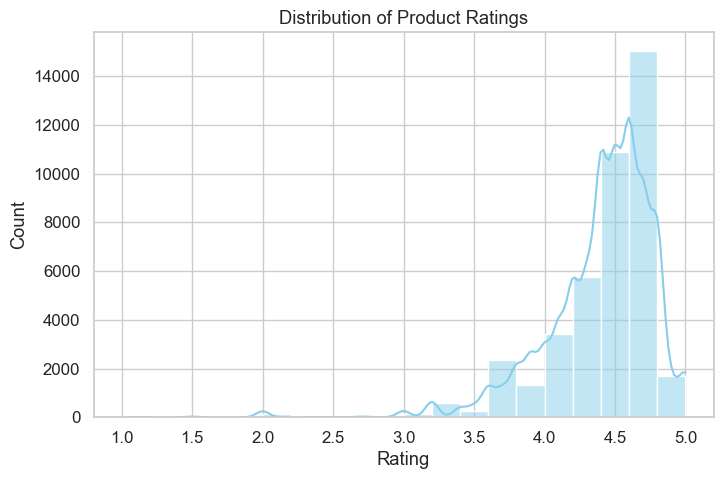

In [45]:
# Distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['product_rating'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

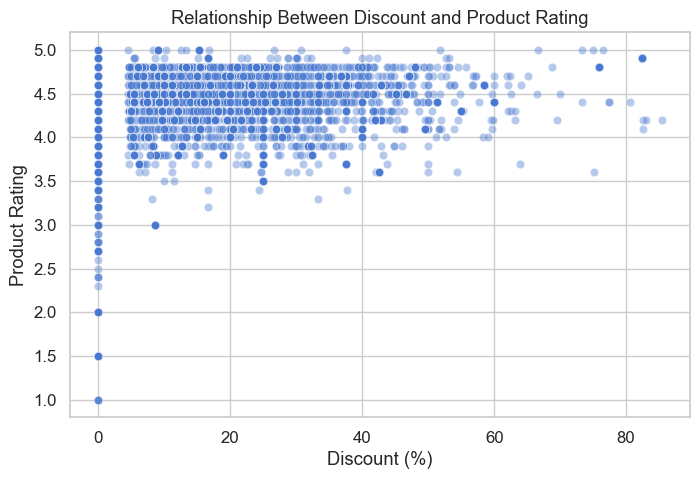

In [46]:
# Discount vs. Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='discount_percentage', y='product_rating', alpha=0.4)
plt.title("Relationship Between Discount and Product Rating")
plt.xlabel("Discount (%)")
plt.ylabel("Product Rating")
plt.show()

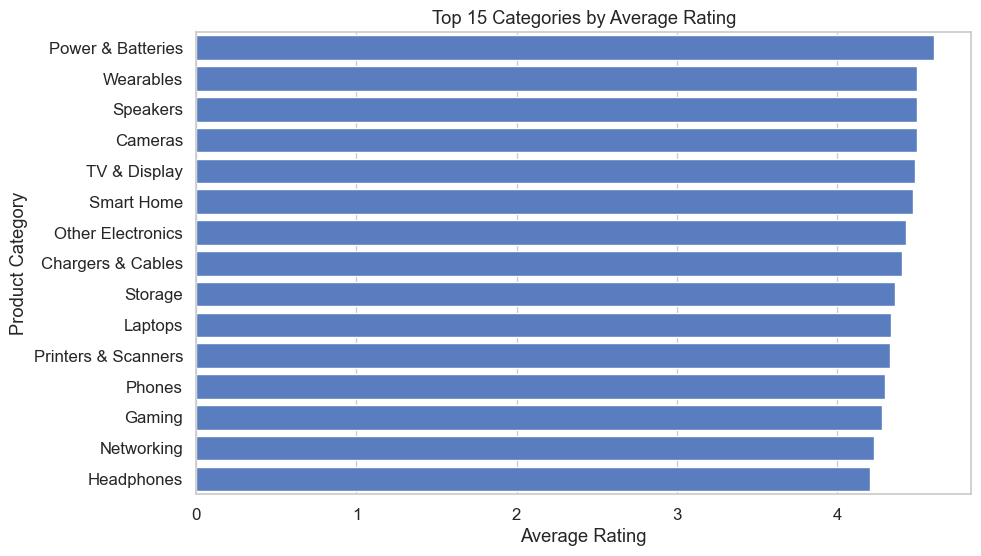

In [47]:
# Average Rating by Category
avg_rating_by_cat = (
    df.groupby('product_category')['product_rating']
    .mean()
    .sort_values(ascending=False)
    .head(15)
)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_cat.values, y=avg_rating_by_cat.index)
plt.title("Top 15 Categories by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Product Category")
plt.show()


Average metrics for Best Sellers vs Non-Best Sellers:
                 product_rating  discount_percentage  total_reviews
is_best_seller                                                    
False                 4.394457             6.154233    2854.511078
True                  4.531636            15.488674   33711.658182


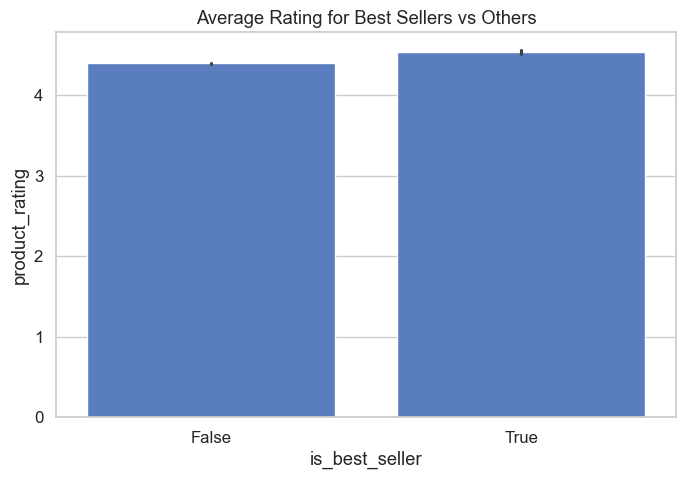

In [48]:
# Bestseller Analysis
best_seller_stats = df.groupby('is_best_seller')[['product_rating', 'discount_percentage', 'total_reviews']].mean()
print("\nAverage metrics for Best Sellers vs Non-Best Sellers:\n", best_seller_stats)

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='is_best_seller', y='product_rating')
plt.title("Average Rating for Best Sellers vs Others")
plt.show()

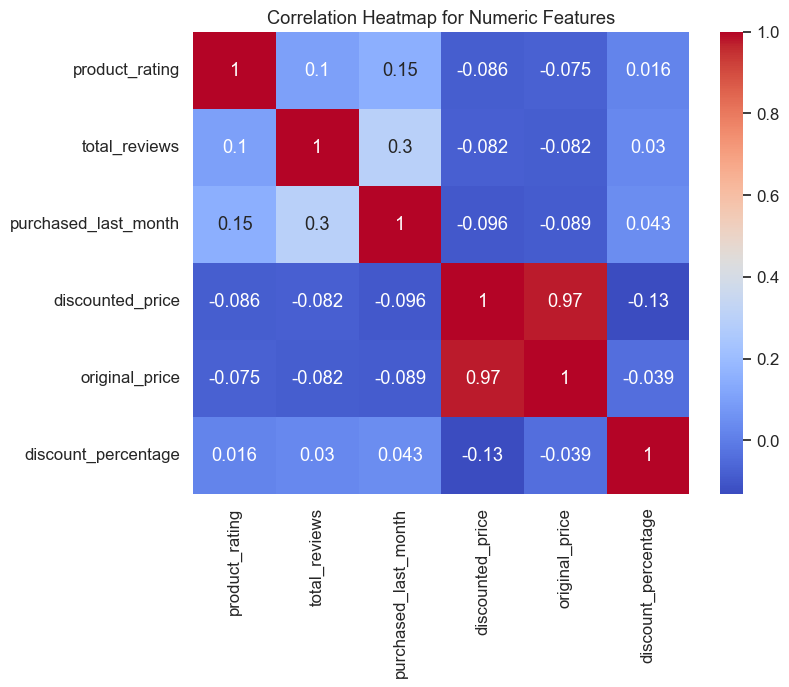

In [49]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['float64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Numeric Features")
plt.show()